In [1]:
pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.2.6-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
df = pd.read_csv("Survey Data.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   User ID                            470 non-null    int64  
 1   First Name                         470 non-null    object 
 2   Last Name                          470 non-null    object 
 3   Email                              470 non-null    object 
 4   Phone Number                       470 non-null    int64  
 5   Age                                470 non-null    int64  
 6   Verified                           470 non-null    object 
 7   Referral Code                      314 non-null    object 
 8   Referred By                        301 non-null    object 
 9   Referred Users Count               470 non-null    int64  
 10  Has Survey                         470 non-null    object 
 11  Survey ID                          363 non-null    float64

In [4]:
# dropping unnecesary columns
columns_to_drop = [
    'First Name', 'Last Name', 'Email', 'Phone Number', 'Referral Code',
    'Referred By', 'Survey ID', 'Survey Date', 'User ID'
]
df.drop(columns=columns_to_drop, inplace=True)



In [5]:
# rename columns 
df.rename(columns={
    'Survey: grade': 'Grade',
    'Survey: educationType': 'Education_Type',
    'Survey: consideringPostSecondary': 'Interested_in_College',
    'Survey: financingOptions': 'Financing_Options',
    'Survey: careerConfidence': 'Career_Confidence',
    'Survey: expectedFinalAverage': 'GPA_Estimate',
    'Survey: specificProgram': 'Preferred_College_Major',
    'Survey: city': 'City',
    'Survey: motivationFactors': 'Motivation_Factors',
    'Survey: applicationBarriers': 'Application_Barriers'
}, inplace=True)

In [6]:
df = df[df['Has Survey'] == 'Yes']  # Keep only those who took the survey
df = df[df['Interested_in_College'].notna()]  # Keep meaningful survey responses
df['Preferred_College_Major'].fillna("Undecided", inplace=True)
df['GPA_Estimate'] = df['GPA_Estimate'].str.extract(r'(\d+\.?\d*)').astype(float)


/var/folders/pw/_9s0n0fd6mj9xgv1t7x1xwt00000gn/T/ipykernel_23127/2797661368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Preferred_College_Major'].fillna("Undecided", inplace=True)


In [8]:
# creating useful features 
df['High_Achiever'] = df['GPA_Estimate'] >= 85
df['Needs_Financial_Aid'] = df['Financing_Options'].str.contains("Loan|Scholarship", na=False)
df['PostSecondary_Interest'] = df['Interested_in_College'].map({'Yes': 1, 'No': 0})


In [9]:
# group -level insights 

# % Interested in College by Grade
college_interest_by_grade = df.groupby('Grade')['PostSecondary_Interest'].mean().sort_index()

# Top Preferred Majors
top_majors = df['Preferred_College_Major'].value_counts().head(10)



In [10]:
# analyzing career confidence 
career_confidence = df['Career_Confidence'].value_counts()


In [11]:
pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 6.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


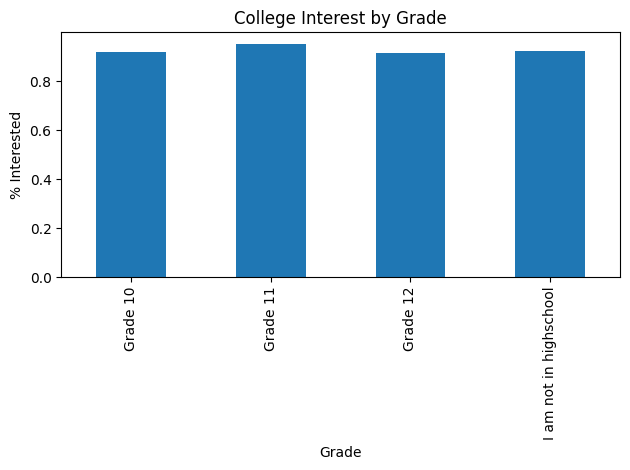

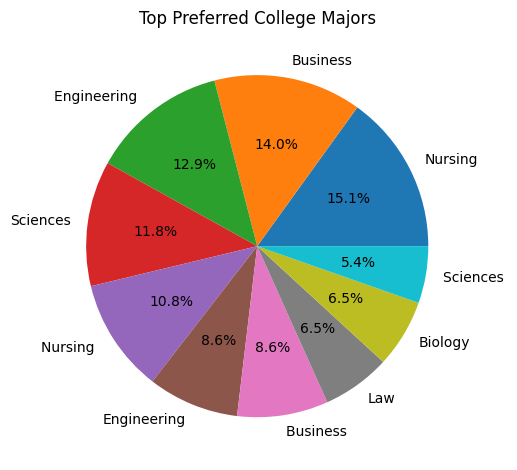

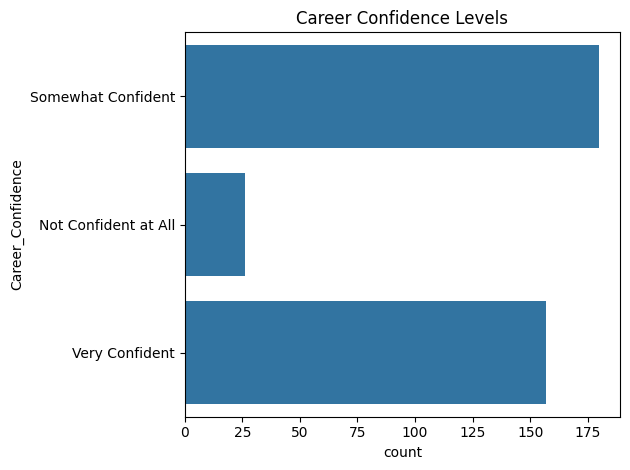

In [12]:
# creating visuals 
import matplotlib.pyplot as plt
import seaborn as sns

# Bar: College Interest by Grade
college_interest_by_grade.plot(kind='bar', title='College Interest by Grade', ylabel='% Interested')
plt.tight_layout()
plt.show()

# Pie: Top Majors
top_majors.plot(kind='pie', autopct='%1.1f%%', title='Top Preferred College Majors')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Countplot: Career Confidence
sns.countplot(y='Career_Confidence', data=df)
plt.title('Career Confidence Levels')
plt.tight_layout()
plt.show()
